<a href="https://colab.research.google.com/github/xy0802/441b/blob/main/441bhw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Country-data.csv", sep = ",")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle 

In [35]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2.) Plot a Scatter plot of the PCs on the axis

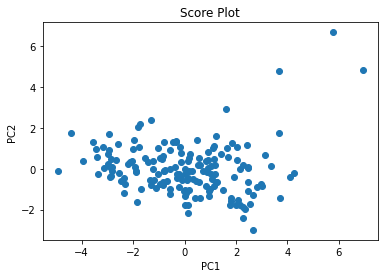

In [36]:
# Plot the score plot
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Score Plot')
plt.show()

# 3.) Rank the features in order of importance according to PCA

In [ ]:
feature_names = df.columns[1:]
df_contrib = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_names)
df_contrib_abs = df_contrib.abs()
df_contrib_abs_sorted_PC1 = df_contrib_abs.sort_values(by='PC1', ascending=False)
df_contrib_abs_sorted_PC2 = df_contrib_abs.sort_values(by='PC2', ascending=False)

print("Feature contributions sorted by PC1:")
print(df_contrib_abs_sorted_PC1)

print("Feature contributions sorted by PC2:")
print(df_contrib_abs_sorted_PC2)

Feature contributions sorted by PC1:
                 PC1       PC2
life_expec  0.425839  0.222707
child_mort  0.419519  0.192884
total_fer   0.403729  0.155233
income      0.398441  0.022536
gdpp        0.392645  0.046022
exports     0.283897  0.613163
inflation   0.193173  0.008404
imports     0.161482  0.671821
health      0.150838  0.243087
Feature contributions sorted by PC2:
                 PC1       PC2
imports     0.161482  0.671821
exports     0.283897  0.613163
health      0.150838  0.243087
life_expec  0.425839  0.222707
child_mort  0.419519  0.192884
total_fer   0.403729  0.155233
gdpp        0.392645  0.046022
income      0.398441  0.022536
inflation   0.193173  0.008404


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

In [ ]:
feature_names = df.columns[1:]

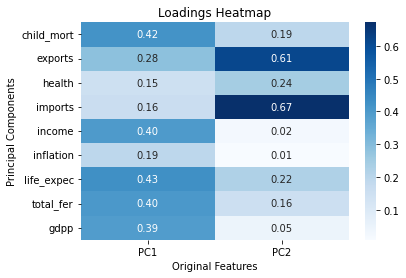

In [38]:
sns.heatmap(df_contrib_abs, cmap='Blues', annot=True, fmt='.2f')
plt.title('Feature Importance')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

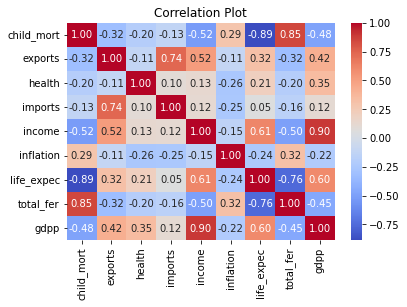

In [39]:
corr_matrix = df.iloc[:, 1:].corr()

# Plot the correlation plot
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Plot')
plt.show()

From the two plots we can notice high importance varible may have high correlation with other varibles, such as import and export.
On the other hand, some variables do not have high correlation with other variable but are highly important, which may omply they include unique information, for example, child mortality .

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [40]:
pca = PCA(n_components=9)
pca.fit(X)

PCA(n_components=9)

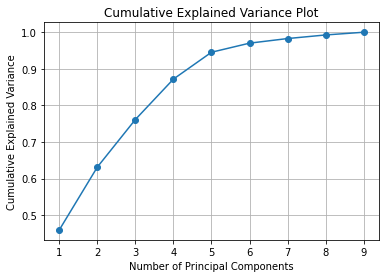

In [41]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

From the plot we can see we need around 6 components to retain 95% of teh variance

In [42]:
# Find the number of components needed to retain 95% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.where(cumulative_variance_ratio >= 0.95)[0][0] + 1
print("Number of components needed to retain 95% of the variance:", n_components_95)


Number of components needed to retain 95% of the variance: 6
